In [30]:
import torch
import sys
import numpy as np
from numpy import linalg as LA  
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
sys.path.append('../atari')

weight_dir = "/lichenghao/lzh/CRL/componet/experiments/atari/agents/Freeway/ModelZoo/"
# weight_dir = '/lichenghao/lzh/componet/experiments/atari/agents/Freeway/ModelZoo/'
weight_paths = [ weight_dir + f"Freeway_{i}_FuseNet_42" for i in range(8)]


In [31]:
def get_fuse_weight(state_dict, idx: int, param: str="weight", module: str = "actor"):
    if module == "actor":
        fuse_layers = [0,2]
    elif module == "encoder":
        fuse_layers = [0,2,4,7]
    result = state_dict[f'network.{fuse_layers[idx]}.{param}'].numpy()
    return result

In [32]:
def get_vectors(weight_paths, module: str = "actor", param: str="weight", layer_idx=0):
    vectors = []
    base = None
    for idx, task_weight_path in enumerate(weight_paths):
        state_dict = torch.load(task_weight_path+f"/{module}.pt", map_location="cpu").state_dict() 
        if idx > 0:
            vectors.append(get_fuse_weight(state_dict,layer_idx,param,module) - base)
        else:
            base = get_fuse_weight(state_dict,layer_idx,param,module)
            vectors.append(base - base)
            print(LA.norm(base))
    return vectors

In [33]:
def plot_similarity_matrix(vectors):
    # Calculate cosine similarity matrix
    cos_sim_matrix = cosine_similarity([w.flatten() for w in vectors]) / len(vectors[0].flatten())

    # Plot the similarity matrix
    plt.figure(figsize=(8, 8))
    plt.imshow(cos_sim_matrix, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.title('Cosine Similarity Matrix')
    plt.xlabel('Vectors Index')
    plt.ylabel('Vectors Index')
    plt.tight_layout()
    plt.grid(True, which='both', color='black', linewidth=0.5, linestyle='--', alpha=0.2)
    # Adjust tick labels
    plt.xticks(np.arange(len(cos_sim_matrix)), fontsize=10)
    plt.yticks(np.arange(len(cos_sim_matrix)), fontsize=10)
    plt.show()
    plt.close()
    
def plot_diff_matrix(vectors, normalize=True):
    n = len(vectors)
    size = (vectors[0].size) / 1000
    if normalize:
        diff_matrix = [[LA.norm(vectors[i] + vectors[j]) for j in range(n)] for i in range(n)]
    else:
        diff_matrix = [[(vectors[i] + vectors[j]).sum() for j in range(n)] for i in range(n)]
        
    coef1 = sum([sum(diff_matrix[i][i:]) for i in range(1,n)])        
    coef2 = sum(diff_matrix[0])
    # print(coef1 / coef2 * (2 * (n -1)) / (n-2) / (n-2))
    plt.figure(figsize=(8, 8))
    plt.imshow(diff_matrix, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.title('Diff Matrix')
    plt.xlabel('Vectors Index')
    plt.ylabel('Vectors Index')

    # Add text annotations
    for i in range(n):
        for j in range(n):
            plt.text(j, i, f'{diff_matrix[i][j]:.2f}', ha='center', va='center', color='black')

    plt.show()
    
def plot_pca(vectors):
    pca = PCA(n_components=3)
    reduced_vectors = pca.fit_transform([v.flatten() for v in vectors])

    # Plot the reduced vectors
    plt.figure(figsize=(8, 8))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])
    for i, txt in enumerate(range(len(reduced_vectors))):
        plt.annotate(txt, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
    plt.title('PCA of Vectors')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
    
    

32.187664


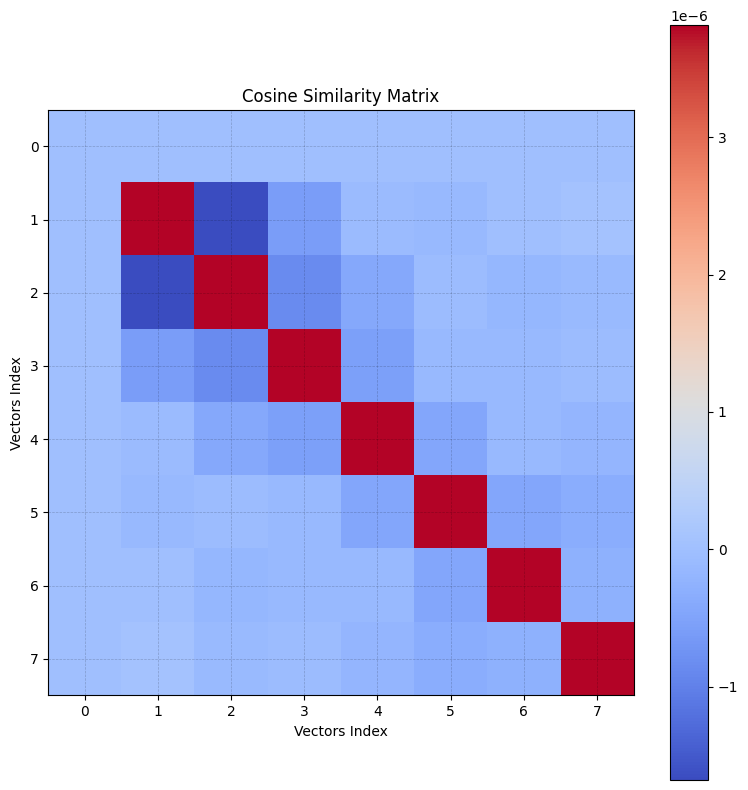

0.5554892


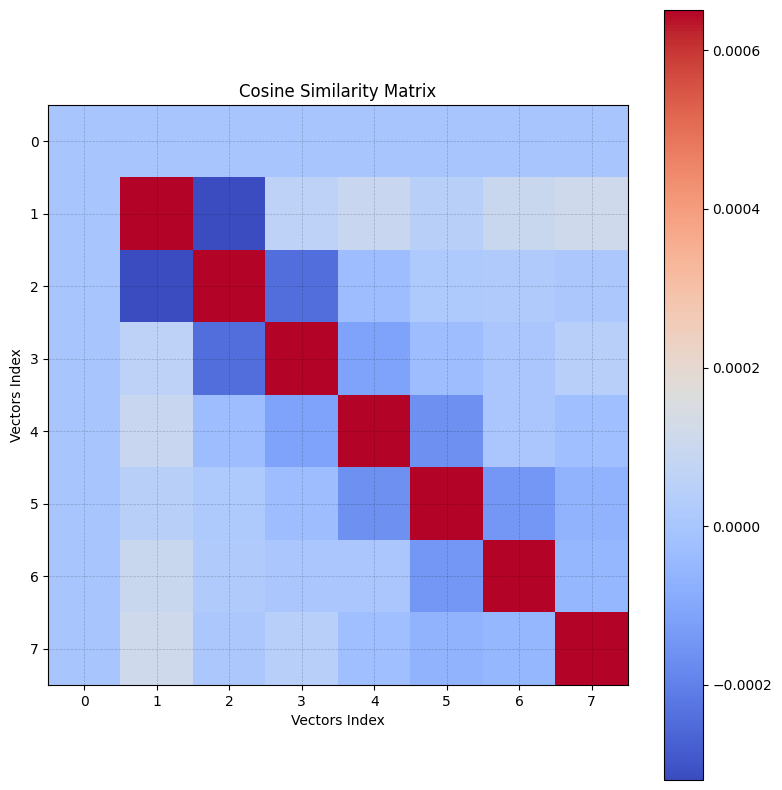

In [34]:
for i in range(2):
    ...
    vectors = get_vectors(weight_paths, module="actor", param="weight", layer_idx=i)
    # vectors = get_vectors(weight_paths, module="actor", param="bias", layer_idx=i)
    # plot_pca(vectors)
    plot_similarity_matrix(vectors)
    # plot_diff_matrix(vectors)
    # plot_diff_matrix(vectors, normalize=False)

# for i in range(4):
#     vectors = get_vectors(weight_paths, module="encoder", param="weight", layer_idx=i)
#     # vectors = get_vectors(weight_paths, module="encoder", param="bias", layer_idx=i)
#     # plot_pca(vectors)
#     plot_similarity_matrix(vectors)
#     # plot_diff_matrix(vectors)
#     # plot_diff_matrix(vectors,normalize=False)